In [1]:
import warnings

import numpy as np

from modules import Control
from modules import Environment
from modules import Model

warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
def get_env():
    environment_input = Environment(
        steps=35,
        max_value_of_trade=100.0,
        number_of_points_in_sampling=25,
        n=1,
        d=2,
        kappa=np.array([[0, 0], [0, 1]]) * 5 * 10**-3,  # Имитация уровня риска и взаимосвязи между валютами (+)
        alpha=np.array([[[0, 1], [1, 0]]]) * -0.3,  # Установка коэффициентов для логистической функции
        beta=np.array([[[0, 1], [1, 0]]]) * 3.5,  # Установка коэффициентов для логистической функции
        psi=np.array([[0, 1.], [1., 0]]) * 0.1,  # Имитация уровня риска для транзакций (+)
        eta=np.array([[0, 1.], [1., 0]]) * 1e-5,  # Имитация уровня риска для транзакций (+)
        lambdas=lambda z: np.array([[[0, 1 / np.exp((z/5)**2)], [1 / np.exp((z/5)**2), 0]]]) * 1000,  # Установка интенсивности для каждой валюты
        mu=lambda t: np.zeros((2)),  # Установка дрейфа для каждой валюты
        sigma=np.array([[0, 0], [0, 0.005]]),  # Установка шума для каждой валюты
        market_impact=np.ones((2)) * 5 * 10**-4,  # Влияние на рынок для каждой валюты
        T=1.0,  # Определение временного интервала
        gamma=0.01  # Определение коэффициента риска
    )
    return environment_input

In [4]:
def main():
    env = get_env()
    ctrl = Control(env)
    model = Model(
        q_0=np.ones((2)) * 100,
        X_0=100,
        S_0=np.ones((2)) * 100,
        environment=env,
        optimal_control=ctrl
    )
    model.modulation()
    return model

 23%|██▎       | 8/35 [00:00<00:00, 35.29it/s]

diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]


 46%|████▌     | 16/35 [00:00<00:00, 35.25it/s]

diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]


 57%|█████▋    | 20/35 [00:00<00:00, 34.56it/s]

diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]


 80%|████████  | 28/35 [00:00<00:00, 32.36it/s]

diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]


100%|██████████| 35/35 [00:01<00:00, 34.05it/s]


diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
diller [[nan nan]
 [nan nan]]
Final Metric: -531263.8092013813
Stocks: [100. 100.]---->[ 99.69275059 100.277471  ]
Prices: [100. 100.]---->[100.         104.76535721]
Foreign capital: [10000. 10000.]---->[ 9969.2750591 10505.605069 ]


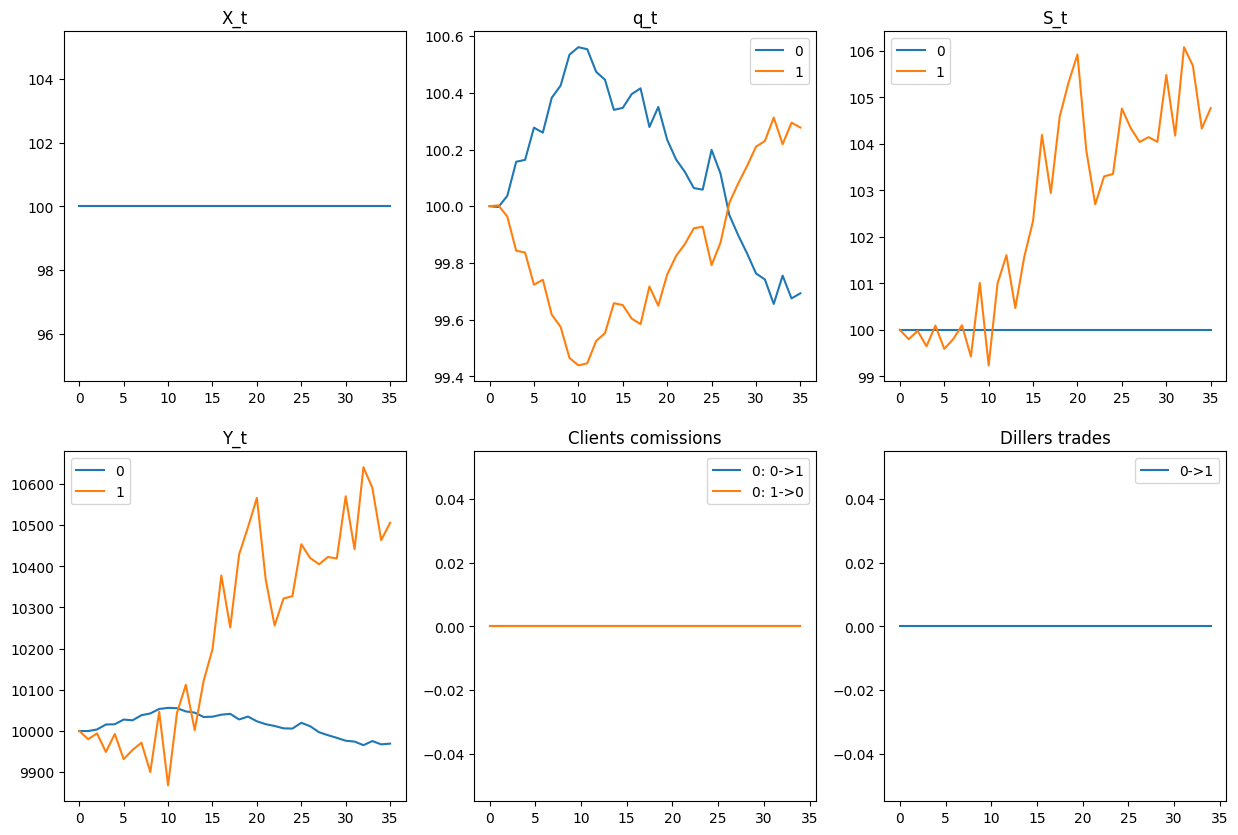

In [5]:
model = main()